In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

## PDF and CDF - Simple
For this section, I started with a basic probability distribution function $ y = Ax $, where A is the normalization constant.
Normalizing from 0 to 1, 

$$ \int_{0}^{1} Ax dx = 1$$
$$A\frac{x^2}{2} = 1$$
Evaluating from x = 0 to x = 1, 
$$A = 2$$
which, applying this normalization factor to the PDF now makes the function $y = 2x$ and the cumulative distribution function is therefore 
$$\int_{0}^{1} 2x = x^2$$

[0, 1, 0, 2]

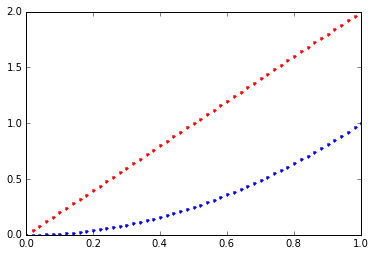

In [155]:

N = 500 #number of points
x = np.linspace(0, 10, N)
pdf = 2*x
cdf = x**2
plt.plot(x, pdf, 'r.')
plt.plot(x, cdf, 'b.')
plt.axis([0,1,0,2])

## PDF and CDF - More Complex
For a more complicated PDF function, I chose to use $Acos^2(x)$ and normalize it over the range from 0 to $\pi$.
$$\int_{0}^{\pi} Acos^2(x)dx = 1$$

$$\frac{A}{2}(x + sin(x)cos(x)) = 1$$

Evaluating from 0 to $\pi$:

$$A(\frac{\pi}{2}) = 1$$
$$A = \frac{2}{\pi}$$

This now makes the PDF function $\frac{2}{\pi}cos^2(x)$. The CDF is therefore
$$\frac{1}{\pi}(x + sin(x)cos(x))$$

[0, 3.141592653589793, 0, 1]

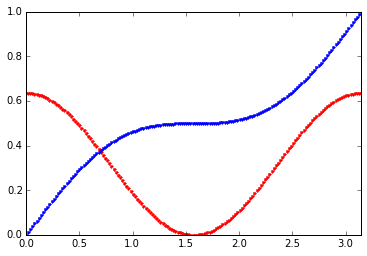

In [156]:
# more complex function
pdf = (2./np.pi)*np.cos(x)**2
cdf = (1./np.pi)*(x+np.sin(x)*np.cos(x))
#cdf = np.e**(-x**2)
plt.plot(x, pdf, 'r.')
plt.plot(x, cdf, 'b.')
plt.axis([0,np.pi,0,1])

## Rejection Sampling - Simple

For this section I used the simple one dimensional PDF that I found in the first section, $y = Ax$. I also chose to draw 1000 samples from this PDF, over the range x = 5 to x = 20. To normalize the function, I integrated:
$$\int_{5}^{20} Ax dx = 1$$
$$A(\frac{20^2}{2} - \frac{5^2}{2}) = 1$$
$$A(375) = 2$$
$$A = \frac{2}{375}$$

So the PDF function is $y = \frac{2}{375} x$ for this range.
The envelope function is also simple and set to y = 1, because for this range 1 is higher than the maximum PDF value, which occurs at $y = \frac{2}{375}(20) = \frac{40}{375}$.

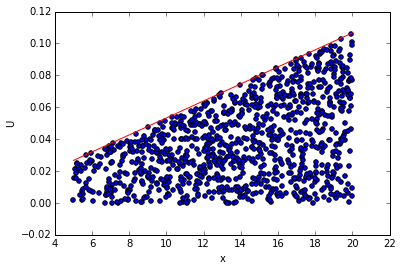

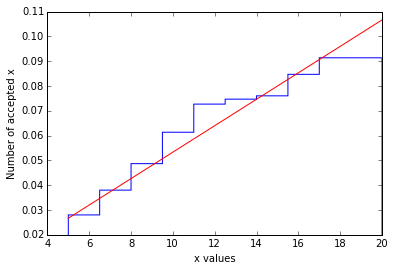

In [157]:
# rejection sampling method
#Simple function again
# pdf = 2x
# test from range 5-20
#need to normalize pdf over range from 5 to 20?


N = 1000 #number of samples to draw
total = 0 #initial number of samples drawn that fall in range
env = 1. #envelope function, needs to be above PDF in range you're looking at (at x=20, pdf = 40)
#currently a flat line above the values

Ulist = list()

while total < N: #while you don't have all the samples yet
    U = np.random.rand() #random number, map to range of y values (0, 50?)
    x = np.random.rand()*15 + 5 #random number mapped to range of x values (5, 20)
    pdf = (2./375.)*x
    
    
    if U < (pdf)/(env): # if condition is met, accept point
        total = total + 1 #add one to the count
        plt.figure(1)
        plt.scatter(x, U) #graph the point. why have to multiply by 50 again?
        #plt.axis([0, 25, 0, 50])
        Ulist.append(x)
    else:
        pass #otherwise do nothing
    
plt.figure(1)
x_exp = np.linspace(5, 20, 100)
exp_pdf = (2./375.)*x_exp #experimental pdf
plt.plot(x_exp, exp_pdf, 'r')
plt.xlabel("x")
plt.ylabel("U")

plt.figure(2)
plt.hist(Ulist, 10, normed = True, histtype = 'step')
plt.plot(x_exp, exp_pdf, 'r')
plt.xlabel("x values")
plt.ylabel("Number of accepted x")




## Rejection Sampling - 2D

For the 2D sample, I chose to use the PDF $A(sin(x)+cos(y))$ over the range $0 < x < \pi$ and $0 < y < \frac{\pi}{2}$ because the PDF cannot be negative.
Normalizing this function over this range leads to
$$A\int_{0}^{\frac{\pi}{2}} \int_{0}^{\frac{\pi}{2}} sin(x)+cos(y) dx dy = 1$$
$$A (\pi) = 1 $$
$$A = \frac{1}{\pi}$$

This makes the normalized PDF $\frac{1}{\pi}(sin(x)+cos(y))$. 

Normalization for the x is only over the y values:
$$\int_{0}^{\frac{\pi}{2}} \frac{1}{\pi} (sin(x)+cos(y)) dy$$
$$ = \frac{1}{2} sin(x) + \frac{1}{\pi}  $$

Normalization for the y is only over x values:
$$\int_{0}^{\frac{\pi}{2}} \frac{1}{\pi} (sin(x)+cos(y)) dx$$
$$ = \frac{1}{2} cos(y) + \frac{1}{\pi} $$

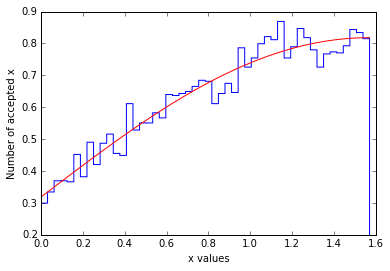

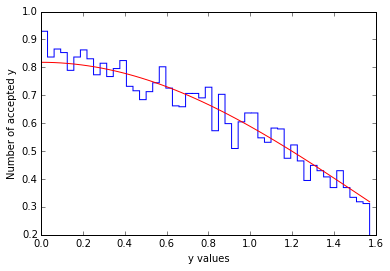

In [158]:
# more complicated rejection sampling function
# pdf = sin(x) + cos(y)
# range to look over 0 to pi

N = 10000 #number of samples to draw
total = 0
Xlist = list()
Ylist = list()

# define PDF as a function that takes an x and y value (can also take arrays/linspace)
def pdf1(x, y):
    return (1/(np.pi))*(np.sin(x) + np.cos(y))


while total < N:
    U = np.random.rand() #random number between 0 and 1
    x = np.random.rand()*(np.pi/2) #random number mapped to range of x values
    y = np.random.rand()*(np.pi/2) #same as above line
    env = 1
        
    if U < pdf1(x, y)/(env): # if condition is met, accept point

        total = total + 1 #add one to the count
        Xlist.append(x)
        Ylist.append(y)
        

    else:
        pass #otherwise do nothing

    
x_exp = np.linspace(0, np.pi/2)
y_exp = np.linspace(0, np.pi/2)
exp_pdf_x = (1/2.)*np.sin(x_exp) + 1/np.pi
plt.figure(3)
plt.hist(Xlist, 50, normed = True, histtype= 'step')
plt.plot(x_exp, exp_pdf_x, 'r')
plt.xlabel("x values")
plt.ylabel("Number of accepted x")


plt.figure(4)
exp_pdf_y = (1/2.)*np.cos(y_exp) + 1./np.pi
plt.hist(Ylist, 50, normed = True, histtype = 'step')
plt.plot(y_exp, exp_pdf_y, 'r')
plt.xlabel("y values")
plt.ylabel("Number of accepted y")





    


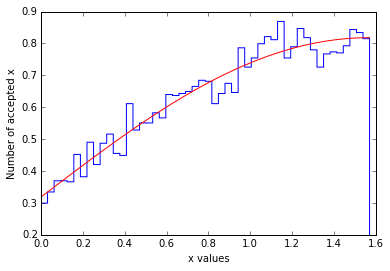

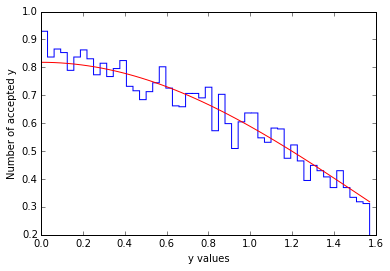

In [159]:
# just histograms, not pdf

nbins = 50
x_exp = np.linspace(0, np.pi/2)
y_exp = np.linspace(0, np.pi/2)
exp_pdf_x = (1/2.)*np.sin(x_exp) + 1/np.pi
plt.figure(3)
plt.hist(Xlist, nbins, normed = True, histtype= 'step')
plt.plot(x_exp, exp_pdf_x, 'r')
plt.xlabel("x values")
plt.ylabel("Number of accepted x")


plt.figure(4)
exp_pdf_y = (1/2.)*np.cos(y_exp) + 1./np.pi
plt.hist(Ylist, nbins, normed = True, histtype = 'step')
plt.plot(y_exp, exp_pdf_y, 'r')
plt.xlabel("y values")
plt.ylabel("Number of accepted y")

(0, 1.5707963267948966)

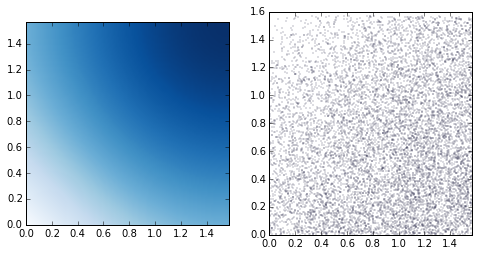

In [162]:
#creates a 2d representation of the PDF function using a meshgrid
X,Y = np.meshgrid(np.linspace(0,np.pi/2.,100), np.linspace(0,np.pi/2.,101))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4)) # 2 subplots, fixes the figure size
ax1.imshow(pdf1(X,Y), cmap='Blues', extent=[0,np.pi/2.,0,np.pi/2.]) # graphs a smooth gradient
ax2.plot(Xlist, Ylist, 'o', ms=0.4, alpha=0.7)
ax2.set_xlim(0,np.pi/2.)


In [11]:
def pdf2(x, y):
    return ((np.e**(-x))*np.sin(y) + 1)

samples = 10000 #number of samples to draw
tot = 0  #total number of matches
env = 2  # envelope function is 2 because e^-x is at most 1 and sin(y) is at most 1
A = 1./(-2*np.e**(-np.pi) + 2 + np.pi**2) #normalization factor 


#x must be over only positive values for the PDF. e^-x is positive everywhere above 0
#y same as above -- sin(y) is positive over 0 to pi
xlist = []
ylist = []

while tot < samples:
    U = np.random.rand() #random number between 0 and 1
    x = np.random.rand()*(np.pi) #random number mapped to range of x values from 0 to pi
    y = np.random.rand()*(np.pi)  #same as above line

        
    if U < A*pdf2(x, y)/(env): # if condition is met, accept point

        tot = tot + 1 #add one to the count
        xlist.append(x)
        ylist.append(y)

    else:
        pass #otherwise do nothing



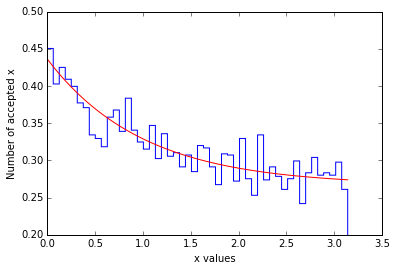

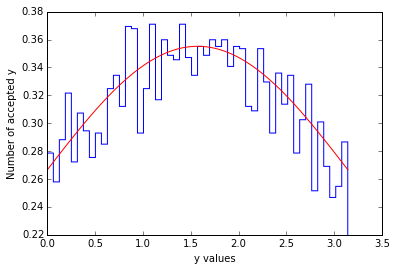

In [12]:
x_exp = np.linspace(0, np.pi)
y_exp = np.linspace(0, np.pi)
exp_pdf_x = A*(2*np.e**(-x_exp) +np.pi)
plt.figure(1)
plt.hist(xlist, 50, normed = True, histtype= 'step')
plt.plot(x_exp, exp_pdf_x, 'r')
plt.xlabel("x values")
plt.ylabel("Number of accepted x")

exp_pdf_y = A*(np.sin(y_exp)*(np.e**(-np.pi) +1)+ np.pi)
plt.figure(2)
plt.hist(ylist, 50, normed = True, histtype= 'step')
plt.plot(y_exp, exp_pdf_y, 'r')
plt.xlabel("y values")
plt.ylabel("Number of accepted y")

(0, 3.141592653589793)

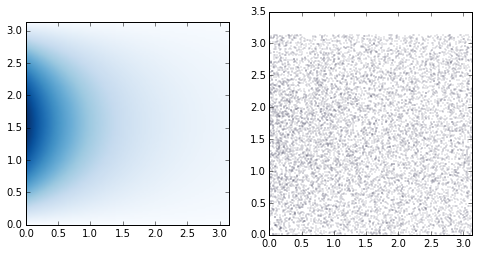

In [13]:
#creates a 2d representation of the PDF function using a meshgrid
X2,Y2 = np.meshgrid(np.linspace(0,np.pi,100), np.linspace(0,np.pi,101))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4)) # 2 subplots, fixes the figure size
ax1.imshow(pdf2(X2,Y2), cmap='Blues', extent=[0,np.pi,0,np.pi]) # graphs a smooth gradient
ax2.plot(xlist, ylist, 'o', ms=0.4, alpha=0.5)
ax2.set_xlim(0,np.pi)

In [30]:
# now do over range from 0 to 4pi

samples = 10000 #number of samples to draw
tot = 0  #total number of matches
env = 2  # envelope function is 2 because e^-x is at most 1 and sin(y) is at most 1
B = 1./(4*np.pi**2) #normalization factor 


#x must be over only positive values for the PDF. e^-x is positive everywhere above 0
#y same as above -- sin(y) is positive over 0 to pi
xlist = []
ylist = []

while tot < samples:
    U = np.random.rand() #random number between 0 and 1
    x = np.random.rand()*(np.pi) #random number mapped to range of x values from 0 to pi
    y = np.random.rand()*(np.pi*4)  #same as above line

        
    if U < B*pdf2(x, y)/(env): # if condition is met, accept point

        tot = tot + 1 #add one to the count
        xlist.append(x)
        ylist.append(y)

    else:
        pass #otherwise do nothing


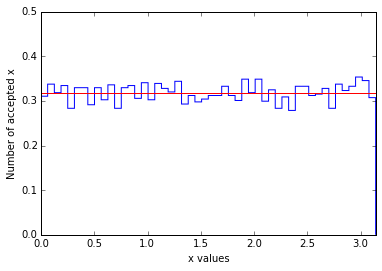

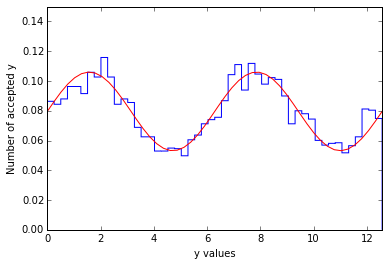

In [46]:
x_exp = np.linspace(0, np.pi)
y_exp = np.linspace(0, np.pi*4)
exp_pdf_x = np.ones(50)*1./np.pi #B*(2*np.e**(-x_exp) +np.pi)
plt.figure(1)
plt.hist(xlist, 50, normed = True, histtype= 'step')
plt.plot(x_exp, exp_pdf_x, 'r')
plt.axis([0, np.pi, 0, .5])
plt.xlabel("x values")
plt.ylabel("Number of accepted x")

exp_pdf_y = B*(np.sin(y_exp)*(np.e**(-np.pi) +1)+ np.pi)
plt.figure(2)
plt.hist(ylist, 50, normed = True, histtype= 'step')
plt.plot(y_exp, exp_pdf_y, 'r')
plt.axis([0, 4*np.pi, 0, .15])
plt.xlabel("y values")
plt.ylabel("Number of accepted y")

(0, 3.141592653589793)

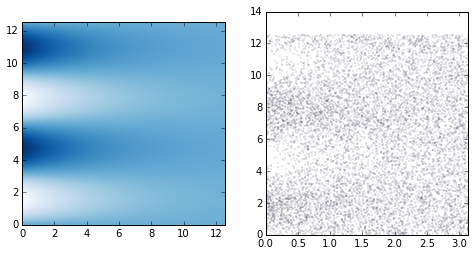

In [49]:
#creates a 2d representation of the PDF function using a meshgrid
X2,Y2 = np.meshgrid(np.linspace(0,np.pi,100), np.linspace(0,np.pi*4,101))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4)) # 2 subplots, fixes the figure size
ax1.imshow(pdf2(X2,Y2), cmap='Blues', extent=[0,np.pi*4,0,np.pi*4]) # graphs a smooth gradient
ax2.plot(xlist, ylist, 'o', ms=0.4, alpha=0.5)
ax2.set_xlim(0,np.pi)

In [86]:
def pdf3(x, y):
    A = 0.1 #constant in front of sin(y)
    return (np.e**(-x)*(0.1*np.sin(y) + 1))

sample = 100000 #number of samples to draw
matches = 0  #total number of matches
env = 2  # envelope function is 2 because e^-x is at most 1 and sin(y) is at most 1
B = 1./((4*np.pi)*(-np.e**(-np.pi) + 1)) #normalization factor 


#x must be over only positive values for the PDF. e^-x is positive everywhere above 0
#y same as above -- sin(y) is positive over 0 to pi
x3list = []
y3list = []

while matches < sample:
    U = np.random.rand() #random number between 0 and 1
    x = np.random.rand()*(np.pi) #random number mapped to range of x values from 0 to pi
    y = np.random.rand()*(np.pi*4)  #random number mapped to range of y values from 0 to 4pi

        
    if U < B*pdf3(x, y)/(env): # if condition is met, accept point

        matches = matches + 1 #add one to the count
        x3list.append(x)
        y3list.append(y)

    else:
        pass #otherwise do nothing



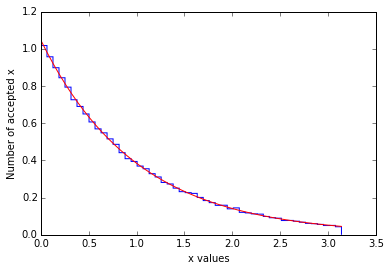

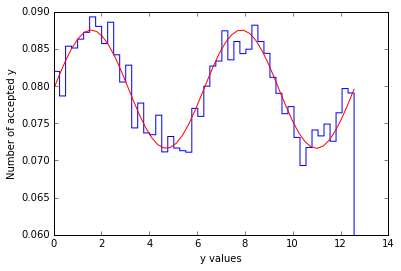

In [87]:
x_exp = np.linspace(0, np.pi)
y_exp = np.linspace(0, np.pi*4)
exp_pdf_x = np.e**(-x_exp) / (-np.e**(-np.pi)+1)
plt.figure(1)
plt.hist(x3list, 50, normed = True, histtype= 'step')
plt.plot(x_exp, exp_pdf_x, 'r')
#plt.axis([0, np.pi, 0, .5])
plt.xlabel("x values")
plt.ylabel("Number of accepted x")

exp_pdf_y = B*(0.1*(np.sin(y_exp))+1)*(-np.e**(-np.pi) +1)
plt.figure(2)
plt.hist(y3list, 50, normed = True, histtype= 'step')
plt.plot(y_exp, exp_pdf_y, 'r')
#plt.axis([0, 4*np.pi, 0, .15])
plt.xlabel("y values")
plt.ylabel("Number of accepted y")

(0, 3.141592653589793)

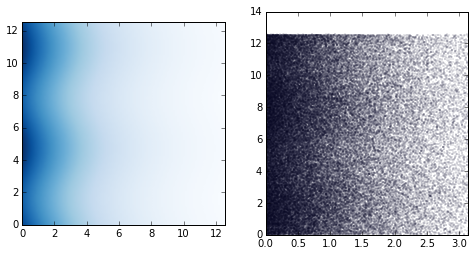

In [90]:
#creates a 2d representation of the PDF function using a meshgrid
X,Y = np.meshgrid(np.linspace(0,np.pi,100), np.linspace(0,np.pi*4,101))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4)) # 2 subplots, fixes the figure size
ax1.imshow(pdf3(X,Y), cmap='Blues', extent=[0,np.pi*4,0,np.pi*4]) # graphs a smooth gradient
ax2.plot(x3list, y3list, 'o', ms=0.4, alpha=0.5)
ax2.set_xlim(0,np.pi)